In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx

%matplotlib inline

In [6]:
records = pd.read_csv('scraped_results_df.csv')
# 'game_loc' indicated where the game was played at. Since the winner is listed first in 
# the original data, the '@' indicates the game was played at the loser's home.  Therefore, 
# we can create a new column called 'Winner_home' if the '@' sign is not present.
records['winner_home'] = records['game_loc']!='@'

# The rank is included in the winner and losers name within parenthesis.  The below regex will identify 
# numerical digits within the parenthesis and extract them to a new column as 'floats'.  We'll also 
# remove the rank in parenthesis from the original winner column.  We'll do this for winners and losers.
records['winner_rank'] = records['winner'].str.extract('\(([0-9]+)\)', expand=True).astype('float')
records['winner_name'] = records['winner'].str.replace('\(([0-9]+)\)', '').str.replace('\xa0', '')
records['loser_rank'] = records['loser'].str.extract('\(([0-9]+)\)', expand=True).astype('float')
records['loser_name'] = records['loser'].str.replace('\(([0-9]+)\)', '').str.replace('\xa0', '')

# Calculate a rank_diff socre.  The more negative this is, the more of an upset it is.
records['rank_diff'] = records['loser_rank'] - records['winner_rank']

# Add a pts_diff between the two pts as we can use margin of victory to see how close a 
# game is.
records['pts_diff'] = records['winner_pts'] - records['loser_pts']

# We no longer need several of these columns, so lets drop them.  
records.drop(['Unnamed: 0', 'winner','loser'], axis=1, inplace=True)

records.set_index(['year','week_number', 'row'], inplace=True)



In [58]:
records.loc[2018]

winner_pts  loser_pts     game_date game_time game_day  \
week_number row                                                           
1           1          43.0       34.0  Aug 25, 2018   7:30 PM      Sat   
            2          63.0       15.0  Aug 25, 2018   5:30 PM      Sat   
            3          31.0       28.0  Aug 25, 2018   7:00 PM      Sat   
            4          29.0        7.0  Aug 25, 2018  10:00 PM      Sat   
2           5          52.0        0.0  Aug 30, 2018   8:00 PM      Thu   
...                     ...        ...           ...       ...      ...   
21          880        27.0       24.0   Jan 1, 2019   1:00 PM      Tue   
            881        40.0       32.0   Jan 1, 2019   1:00 PM      Tue   
            882        28.0       23.0   Jan 1, 2019   5:00 PM      Tue   
            883        28.0       21.0   Jan 1, 2019   8:45 PM      Tue   
            884        44.0       16.0   Jan 7, 2019   8:00 PM      Mon   

                game_loc                                              notes  \
week_number row                                                               
1           1          @  Sonny Lubrick Field at Canvas Stadium - Fort C...   
            2        NaN  Warren McGuirk Alumni Stadium - Amherst, Massa...   
            3        NaN                      Rice Stadium - Houston, Texas   
            4          @    Aggie Memorial Stadium - Las Cruces, New Mexico   
2           5        NaN                 Legion Field - Birmingham, Alabama   
...                  ...                                                ...   
21          880      NaN  Citrus Bowl (Camping World Stadium - Orlando, ...   
            881      NaN  Fiesta Bowl (State Farm Stadium - Glendale, Ar...   
            882      NaN       Rose Bowl (Rose Bowl - Pasadena, California)   
            883      NaN  Sugar Bowl (Mercedes-Benz Superdome - New Orle...   
            884      NaN  College Football Championship (Levi's Stadium ...   

                 winner_home  winner_rank         winner_name  loser_rank  \
week_number row                                                             
1           1          False          NaN              Hawaii         NaN   
            2           True          NaN       Massachusetts         NaN   
            3           True          NaN                Rice         NaN   
            4          False          NaN             Wyoming         NaN   
2           5           True          NaN  Alabama-Birmingham         NaN   
...                      ...          ...                 ...         ...   
21          880         True         16.0            Kentucky        13.0   
            881         True         11.0     Louisiana State         7.0   
            882         True          5.0          Ohio State         9.0   
            883         True         14.0               Texas         6.0   
            884         True          2.0             Clemson         1.0   

                       loser_name  rank_diff  pts_diff  
week_number row                                         
1           1      Colorado State        NaN       9.0  
            2            Duquesne        NaN      48.0  
            3    Prairie View A&M        NaN       3.0  
            4    New Mexico State        NaN      22.0  
2           5      Savannah State        NaN      52.0  
...                           ...        ...       ...  
21          880        Penn State       -3.0       3.0  
            881   Central Florida       -4.0       8.0  
            882        Washington        4.0       5.0  
            883           Georgia       -8.0       7.0  
            884           Alabama       -1.0      28.0  

[884 rows x 14 columns]

In [86]:
G = nx.from_pandas_edgelist(records.loc[2018], 'winner_name','loser_name', 
                            edge_attr='rank_diff')

In [87]:
G.edges(data=True)

EdgeDataView([('Hawaii', 'Colorado State', {'rank_diff': nan}), ('Hawaii', 'Navy', {'rank_diff': nan}), ('Hawaii', 'Rice', {'rank_diff': nan}), ('Hawaii', 'Army', {'rank_diff': nan}), ('Hawaii', 'Duquesne', {'rank_diff': nan}), ('Hawaii', 'San Jose State', {'rank_diff': nan}), ('Hawaii', 'Wyoming', {'rank_diff': nan}), ('Hawaii', 'Brigham Young', {'rank_diff': nan}), ('Hawaii', 'Nevada', {'rank_diff': nan}), ('Hawaii', 'Fresno State', {'rank_diff': nan}), ('Hawaii', 'Utah State', {'rank_diff': nan}), ('Hawaii', 'Nevada-Las Vegas', {'rank_diff': nan}), ('Hawaii', 'San Diego State', {'rank_diff': nan}), ('Hawaii', 'Louisiana Tech', {'rank_diff': nan}), ('Colorado State', 'Colorado', {'rank_diff': nan}), ('Colorado State', 'Arkansas', {'rank_diff': nan}), ('Colorado State', 'Florida', {'rank_diff': nan}), ('Colorado State', 'Illinois State', {'rank_diff': nan}), ('Colorado State', 'San Jose State', {'rank_diff': nan}), ('Colorado State', 'New Mexico', {'rank_diff': nan}), ('Colorado State

In [88]:
G.edge_attr_dict_factory['Alabama']

TypeError: 'type' object is not subscriptable

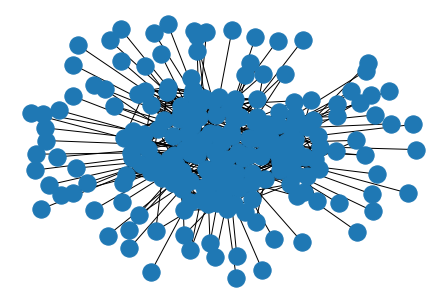

In [92]:
nx.draw(G, figsize=(16,10))

In [72]:
# should be number of teams
print(len(G.nodes))
# should be number of games
print(len(G.edges))

219
877


In [73]:
G.edges()

EdgeView([('Hawaii', 'Colorado State'), ('Hawaii', 'Navy'), ('Hawaii', 'Rice'), ('Hawaii', 'Army'), ('Hawaii', 'Duquesne'), ('Hawaii', 'San Jose State'), ('Hawaii', 'Wyoming'), ('Hawaii', 'Brigham Young'), ('Hawaii', 'Nevada'), ('Hawaii', 'Fresno State'), ('Hawaii', 'Utah State'), ('Hawaii', 'Nevada-Las Vegas'), ('Hawaii', 'San Diego State'), ('Hawaii', 'Louisiana Tech'), ('Colorado State', 'Colorado'), ('Colorado State', 'Arkansas'), ('Colorado State', 'Florida'), ('Colorado State', 'Illinois State'), ('Colorado State', 'San Jose State'), ('Colorado State', 'New Mexico'), ('Colorado State', 'Boise State'), ('Colorado State', 'Wyoming'), ('Colorado State', 'Nevada'), ('Colorado State', 'Utah State'), ('Colorado State', 'Air Force'), ('Massachusetts', 'Duquesne'), ('Massachusetts', 'Boston College'), ('Massachusetts', 'Georgia Southern'), ('Massachusetts', 'Florida International'), ('Massachusetts', 'Charlotte'), ('Massachusetts', 'Ohio'), ('Massachusetts', 'South Florida'), ('Massachus

In [48]:
 sorted(d for n, d in G.degree())

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,

In [85]:
23.67 + 24.5 + 47.67 + 4.7

100.54